# Explore here

In [1]:
# Your code here
# Paso 1: Carga del conjunto de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import joblib

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

print(df.head())
df.info()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

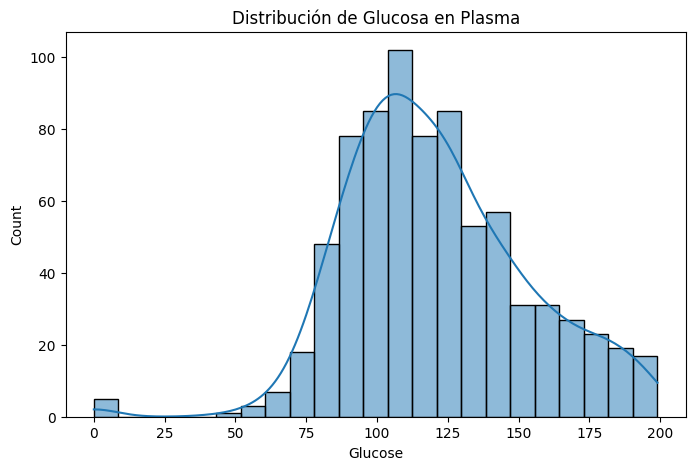

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Tamaño de entrenamiento: (614, 8), Tamaño de prueba: (154, 8)
Exactitud del modelo: 0.75


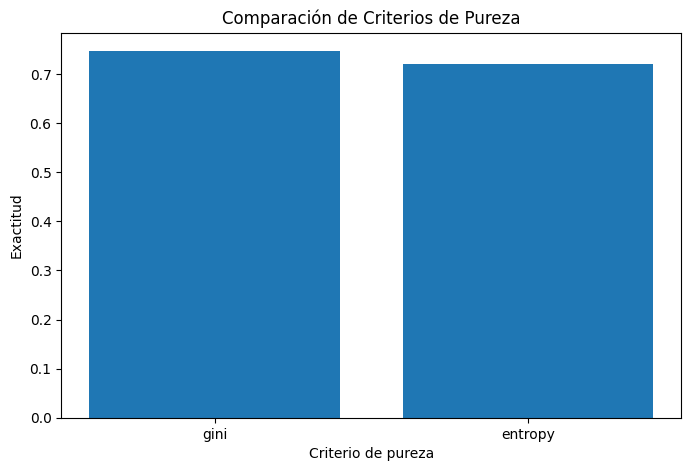

Exactitud del modelo optimizado: 0.76
Modelo guardado como decision_tree_model.pkl


In [2]:

# Paso 2: Realiza un EDA completo
print(df.describe())

plt.figure(figsize=(8,5))
sns.histplot(df["Glucose"], kde=True)
plt.title("Distribución de Glucosa en Plasma")
plt.show()

print("Valores nulos por columna:")
print(df.isnull().sum())

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")

# Paso 3: Construye un modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Comparación de funciones de pureza
criteria = ["gini", "entropy"]
results = {}

for criterion in criteria:
    model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[criterion] = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.xlabel("Criterio de pureza")
plt.ylabel("Exactitud")
plt.title("Comparación de Criterios de Pureza")
plt.show()

# Paso 4: Optimiza el modelo anterior
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Exactitud del modelo optimizado: {accuracy_best:.2f}")

# Paso 5: Guarda el modelo
joblib.dump(best_model, "decision_tree_model.pkl")
print("Modelo guardado como decision_tree_model.pkl")